In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


In [3]:
#데이터 불러오기
dataset = pd.read_csv('./nephropathy_dataset.csv')
dataset.head()

,sample,group,F0160,F0196,F0249,F0297,F0307,F0343,F0346,F0360,...,F1642,F1644,F1654,F1661,F1664,F1673,F1678,F1679,F1680,F1681
0,P_1_IgAN,IgAN,1.142403e+08,7.070960e+07,9775631556,135138804.9,1.143517e+09,9049868316,1.013420e+09,1.133656e+08,...,25230043.95,111232078.7,237458451.2,2795789769,157904015.1,8.011176e+07,180489097.7,346097649.9,20581746.00,308064123.6
1,P_10_IgAN,IgAN,9.702087e+07,1.332498e+08,13287215585,137384501.8,1.235676e+09,12568463232,1.162556e+09,8.380902e+07,...,32868215.86,186951046.0,296694075.7,4724555250,126230251.8,1.521238e+08,258735522.3,393102408.7,10933723.08,473984275.7
2,P_100_MN,MN,1.122328e+08,9.994140e+07,12815602853,154339982.0,9.648844e+08,11662704481,8.655766e+08,1.148080e+08,...,29833389.98,188404058.6,238466281.4,3256837228,109389020.1,1.506269e+08,247240213.4,444571313.2,24471534.49,457901009.5
3,P_101_DMN,DMN,1.178547e+08,1.389706e+08,12203406144,129277433.8,1.194023e+09,12549108656,1.094586e+09,9.197134e+07,...,41327077.16,204842775.8,157394205.5,8343410427,105271671.3,1.420370e+08,322140375.2,440519808.1,16969190.44,862627773.7
4,P_102_IgAN,IgAN,1.063148e+08,5.724365e+07,12980955663,135828348.7,1.163812e+09,12864754434,1.050891e+09,1.168102e+08,...,35880636.17,161873888.3,239592031.1,3438519432,116139725.2,1.069596e+08,265246172.8,365675436.4,23257639.62,476870829.8


In [4]:
#'sample' column은 학습에 관계없는 값이므로 drop
dataset.drop(['sample'], axis=1, inplace = True)

In [5]:
#label이 될 'group'을 정수형으로 인코딩(1. 어떠한 원인으로 신장질환이 발병했는지 분류)
dataset.info()
dataset['group'].replace('DMN', 0, inplace=True)
dataset['group'].replace('HTN-N',1, inplace=True)
dataset['group'].replace('IgAN',2, inplace=True)
dataset['group'].replace('MN',3, inplace=True)
dataset['group'].replace('Normal',4, inplace=True)
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Columns: 244 entries, group to F1681
dtypes: float64(231), int64(12), object(1)
memory usage: 545.3+ KB


,group,F0160,F0196,F0249,F0297,F0307,F0343,F0346,F0360,F0365,...,F1642,F1644,F1654,F1661,F1664,F1673,F1678,F1679,F1680,F1681
0,2,1.142403e+08,7.070960e+07,9775631556,135138804.9,1.143517e+09,9049868316,1.013420e+09,1.133656e+08,459687707.0,...,25230043.95,111232078.7,237458451.2,2795789769,157904015.1,8.011176e+07,180489097.7,346097649.9,20581746.00,308064123.6
1,2,9.702087e+07,1.332498e+08,13287215585,137384501.8,1.235676e+09,12568463232,1.162556e+09,8.380902e+07,468104661.0,...,32868215.86,186951046.0,296694075.7,4724555250,126230251.8,1.521238e+08,258735522.3,393102408.7,10933723.08,473984275.7
2,3,1.122328e+08,9.994140e+07,12815602853,154339982.0,9.648844e+08,11662704481,8.655766e+08,1.148080e+08,414994522.0,...,29833389.98,188404058.6,238466281.4,3256837228,109389020.1,1.506269e+08,247240213.4,444571313.2,24471534.49,457901009.5
3,0,1.178547e+08,1.389706e+08,12203406144,129277433.8,1.194023e+09,12549108656,1.094586e+09,9.197134e+07,457563663.9,...,41327077.16,204842775.8,157394205.5,8343410427,105271671.3,1.420370e+08,322140375.2,440519808.1,16969190.44,862627773.7
4,2,1.063148e+08,5.724365e+07,12980955663,135828348.7,1.163812e+09,12864754434,1.050891e+09,1.168102e+08,491612219.6,...,35880636.17,161873888.3,239592031.1,3438519432,116139725.2,1.069596e+08,265246172.8,365675436.4,23257639.62,476870829.8


In [6]:
#각각의 label이 몇 개의 데이터로 이루어져있는지 확인
dataset['group'].value_counts()

2    66
3    66
4    66
0    64
1    24
Name: group, dtype: int64

In [7]:
#SMOTE 오버샘플링 적용

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(y_train.value_counts())
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print(y_train_over.value_counts())

2    56
4    55
0    51
3    45
1    21
Name: group, dtype: int64
SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (228, 243) (228,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (280, 243) (280,)
0    56
2    56
3    56
4    56
1    56
Name: group, dtype: int64


In [8]:
#랜덤 포레스트 예측
rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 100)
rf_clf.fit(X_train_over, y_train_over)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)


In [9]:
print('accuracy : ', accuracy)

accuracy :  0.5862068965517241


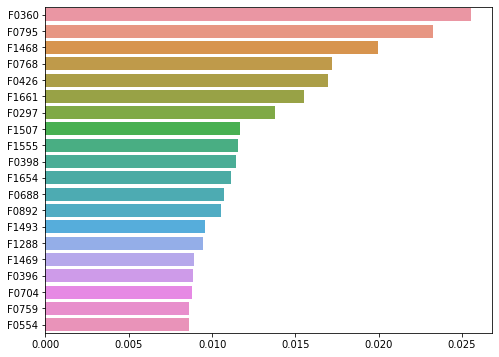

<class 'pandas.core.series.Series'>
Index: 20 entries, F0360 to F0554
Series name: None
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 876.0+ bytes
None


In [10]:
#feature importance 분석
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train_over.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()
print(ftr_top20.info())

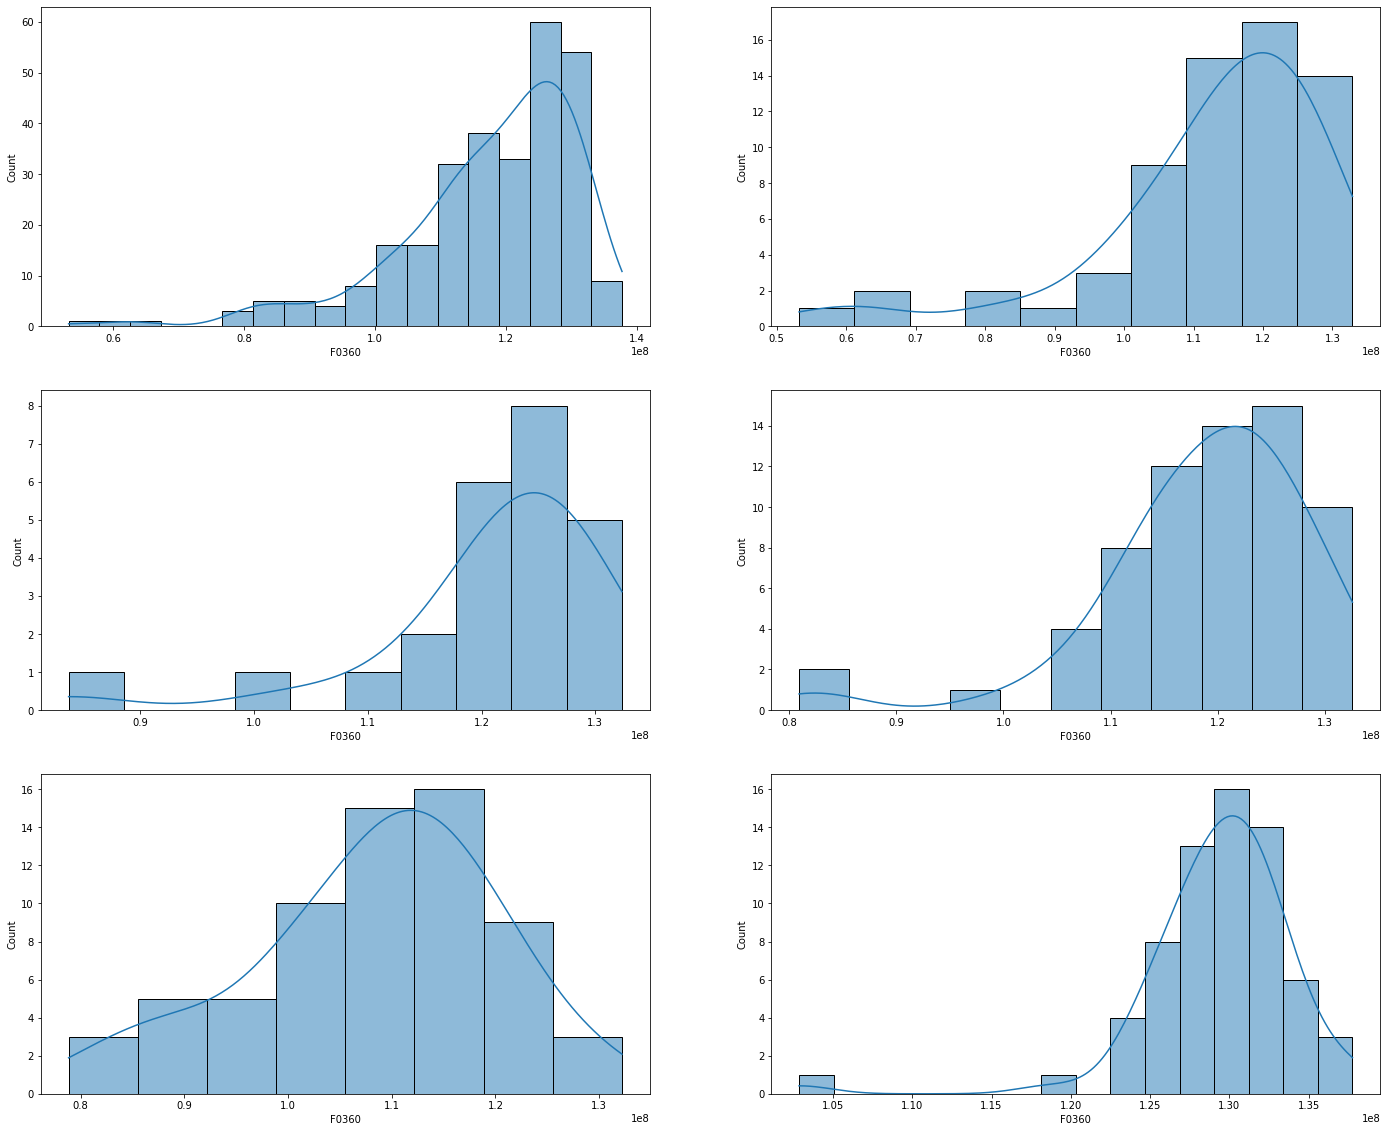

In [11]:
#feature importance가 압도적으로 높은 'F0360'을 시각적으로 분석

dataset_0 = dataset[dataset['group']==0]
dataset_1 = dataset[dataset['group']==1]
dataset_2 = dataset[dataset['group']==2]
dataset_3 = dataset[dataset['group']==3]
dataset_4 = dataset[dataset['group']==4]

fig, axs = plt.subplots(figsize=(24,20), nrows=3, ncols = 2)

sns.histplot(dataset['F0360'], kde=True, ax = axs[0][0])
sns.histplot(dataset_0['F0360'], kde=True, ax = axs[0][1])
sns.histplot(dataset_1['F0360'], kde=True, ax = axs[1][0])
sns.histplot(dataset_2['F0360'], kde=True, ax = axs[1][1])
sns.histplot(dataset_3['F0360'], kde=True, ax = axs[2][0])
sns.histplot(dataset_4['F0360'], kde=True, ax = axs[2][1])
                                                       
plt.show()

In [12]:
#'F0360'의 통계적 분석
dataset.groupby('group')['F0360'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
0,64.0,1.128998e+08,1.652533e+07,5.321132e+07,1.066947e+08,1.162999e+08,1.243336e+08,132885177.0
1,24.0,1.210607e+08,1.042182e+07,8.370603e+07,1.194557e+08,1.244597e+08,1.268625e+08,132348152.2
2,66.0,1.189002e+08,9.741092e+06,8.092749e+07,1.144408e+08,1.205240e+08,1.243885e+08,132565241.2
3,66.0,1.083133e+08,1.194606e+07,7.884944e+07,1.019300e+08,1.097523e+08,1.163286e+08,132198693.6
4,66.0,1.293493e+08,4.796080e+06,1.028602e+08,1.273536e+08,1.300557e+08,1.319831e+08,137770674.0


In [13]:
#LightGBM을 이용한 분류
lgbm_wrapper = LGBMClassifier(n_estimators=1000, learning_rate=0.05)
lgbm_wrapper.fit(X_train_over, y_train_over, verbose=True)
preds = lgbm_wrapper.predict(X_test)
score = accuracy_score(y_test, preds)
print("LGBM정확도: ", np.round(score,4))

c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBM정확도:  0.7069


In [14]:
dataset = pd.read_csv('./nephropathy_dataset.csv')

#성능지표 함수 선언

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy,precision, recall,f1))

In [15]:
#label이 될 'group'을 정수형으로 인코딩(2. 환자(1)와 일반인(1)만을 분류) 
dataset.head()
dataset.drop(['sample'], axis=1, inplace = True)
dataset.info()
dataset['group'].replace('DMN', 1, inplace=True)
dataset['group'].replace('HTN-N',1, inplace=True)
dataset['group'].replace('IgAN',1, inplace=True)
dataset['group'].replace('MN',1, inplace=True)
dataset['group'].replace('Normal',0, inplace=True)
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Columns: 244 entries, group to F1681
dtypes: float64(231), int64(12), object(1)
memory usage: 545.3+ KB


,group,F0160,F0196,F0249,F0297,F0307,F0343,F0346,F0360,F0365,...,F1642,F1644,F1654,F1661,F1664,F1673,F1678,F1679,F1680,F1681
0,1,1.142403e+08,7.070960e+07,9775631556,135138804.9,1.143517e+09,9049868316,1.013420e+09,1.133656e+08,459687707.0,...,25230043.95,111232078.7,237458451.2,2795789769,157904015.1,8.011176e+07,180489097.7,346097649.9,20581746.00,308064123.6
1,1,9.702087e+07,1.332498e+08,13287215585,137384501.8,1.235676e+09,12568463232,1.162556e+09,8.380902e+07,468104661.0,...,32868215.86,186951046.0,296694075.7,4724555250,126230251.8,1.521238e+08,258735522.3,393102408.7,10933723.08,473984275.7
2,1,1.122328e+08,9.994140e+07,12815602853,154339982.0,9.648844e+08,11662704481,8.655766e+08,1.148080e+08,414994522.0,...,29833389.98,188404058.6,238466281.4,3256837228,109389020.1,1.506269e+08,247240213.4,444571313.2,24471534.49,457901009.5
3,1,1.178547e+08,1.389706e+08,12203406144,129277433.8,1.194023e+09,12549108656,1.094586e+09,9.197134e+07,457563663.9,...,41327077.16,204842775.8,157394205.5,8343410427,105271671.3,1.420370e+08,322140375.2,440519808.1,16969190.44,862627773.7
4,1,1.063148e+08,5.724365e+07,12980955663,135828348.7,1.163812e+09,12864754434,1.050891e+09,1.168102e+08,491612219.6,...,35880636.17,161873888.3,239592031.1,3438519432,116139725.2,1.069596e+08,265246172.8,365675436.4,23257639.62,476870829.8


In [16]:
#SMOTE 오버샘플링 적용
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(y_train.value_counts())
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print(y_train_over.value_counts())

1    176
0     52
Name: group, dtype: int64
SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (228, 243) (228,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (352, 243) (352,)
1    176
0    176
Name: group, dtype: int64


In [17]:
#랜덤 포레스트
rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 100)
rf_clf.fit(X_train_over, y_train_over)
pred = rf_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[11  3]
 [ 1 43]]
정확도: 0.9310, 정밀도: 0.9348, 재현율: 0.9773, F1:0.9556


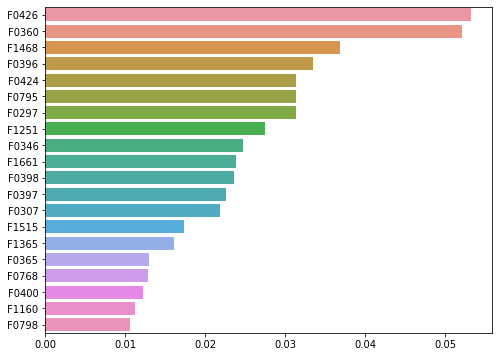

<class 'pandas.core.series.Series'>
Index: 20 entries, F0426 to F0798
Series name: None
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 876.0+ bytes
None


In [18]:
#feature importance
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train_over.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()
print(ftr_top20.info())

In [19]:
#LightGBM 이용
lgbm_wrapper = LGBMClassifier(n_estimators=1000, learning_rate=0.05, max_depth = 500)
lgbm_wrapper.fit(X_train_over, y_train_over, verbose=True)
preds = lgbm_wrapper.predict(X_test)
score = accuracy_score(y_test, preds)
get_clf_eval(y_test, preds)

c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


오차 행렬
[[13  1]
 [ 0 44]]
정확도: 0.9828, 정밀도: 0.9778, 재현율: 1.0000, F1:0.9888


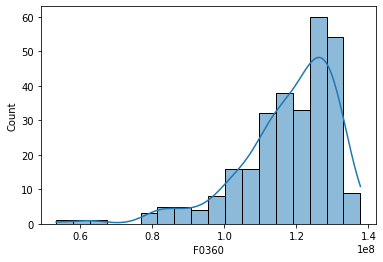

In [20]:
sns.histplot(dataset['F0360'], kde=True)
plt.show()

In [21]:
dataset_0 = dataset[dataset['group']==0]
dataset_1 = dataset[dataset['group']==1]

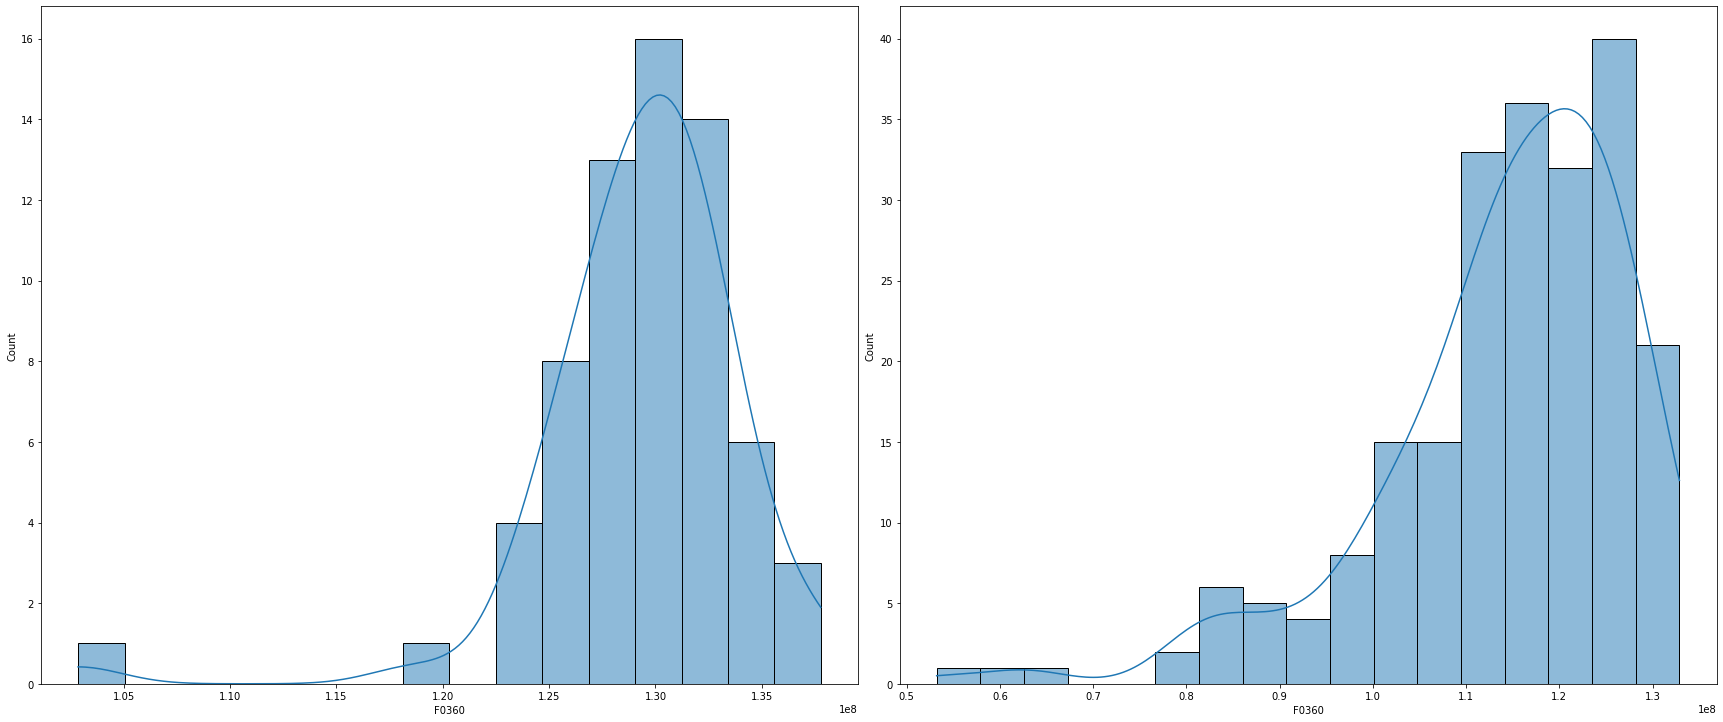

In [22]:
#'F0360'시각적 분석
fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols = 2)
fig.tight_layout()
sns.histplot(dataset_0['F0360'], kde=True, ax = axs[0])
sns.histplot(dataset_1['F0360'], kde=True, ax = axs[1])
plt.show()